# 0.) Import the US Perminent Visas using zip extractor

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


# 1.) US perm Visas csv from cycle using zip extractor


In [3]:
import zipfile

zf = zipfile.ZipFile("/content/gdrive/MyDrive/ECON441B/week5/us_perm_visas.csv.zip") 
df = pd.read_csv(zf.open('us_perm_visas.csv'))

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaN,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaN,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374357,NaN,Buena Park,Law Offices of Yohan Lee,CA,NaN,NaN,A-16363-85407,2016-12-29,Withdrawn,NaN,...,NaN,NaN,N,NaN,"28,330.00",NaN,Year,NaN,NaN,NaN
374358,NaN,Seattle,MacDonald Hoague & Bayless,WA,NaN,NaN,A-16271-56745,2016-12-30,Withdrawn,L-1,...,NaN,Y,N,NaN,"122,000.00","142,000.00",Year,NaN,NaN,NaN
374359,NaN,Schaumburg,International Legal and Business Services Grou...,IL,NaN,NaN,A-16354-82345,2016-12-30,Withdrawn,H-1B,...,NaN,NaN,N,NaN,"79,082.00","79,082.00",Year,NaN,NaN,NaN
374360,NaN,LOS ANGELES,LAW OFFICES OF JAMES S HONG,CA,NaN,NaN,A-16357-84250,2016-12-30,Withdrawn,B-2,...,NaN,NaN,N,NaN,"37,981.00",NaN,Year,NaN,NaN,NaN


In [5]:
for i in df.columns:
  print(i)

add_these_pw_job_title_9089
agent_city
agent_firm_name
agent_state
application_type
case_no
case_number
case_received_date
case_status
class_of_admission
country_of_citizenship
country_of_citzenship
decision_date
employer_address_1
employer_address_2
employer_city
employer_country
employer_decl_info_title
employer_name
employer_num_employees
employer_phone
employer_phone_ext
employer_postal_code
employer_state
employer_yr_estab
foreign_worker_info_alt_edu_experience
foreign_worker_info_birth_country
foreign_worker_info_city
foreign_worker_info_education
foreign_worker_info_education_other
foreign_worker_info_inst
foreign_worker_info_major
foreign_worker_info_postal_code
foreign_worker_info_rel_occup_exp
foreign_worker_info_req_experience
foreign_worker_info_state
foreign_worker_info_training_comp
foreign_worker_ownership_interest
foreign_worker_yr_rel_edu_completed
fw_info_alt_edu_experience
fw_info_birth_country
fw_info_education_other
fw_info_postal_code
fw_info_rel_occup_exp
fw_info

# 2.) Choose 4 features you think are important. Case_status is your target variable


In [6]:
df_select = df[["case_status", "class_of_admission", "application_type", "wage_offer_from_9089"]]
df_select.dropna(inplace = True)


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


# 3.) Clean your data for a decision tree


In [7]:
df_dummies = pd.get_dummies(df_select, columns=["class_of_admission", "application_type"])
X = df_dummies.drop(columns = "case_status")
y = df_select["case_status"]

In [8]:
np.unique(y)


array(['Certified', 'Certified-Expired', 'Denied', 'Withdrawn'],
      dtype=object)

# 4.) Fit and plot a decision tree of depth 3


In [9]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X,y)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'wage_offer_from_9089 <= 46995.0\ngini = 0.587\nsamples = 19364\nvalue = [11260, 4611, 2284, 1209]'),
 Text(0.25, 0.625, 'class_of_admission_H-1B <= 0.5\ngini = 0.649\nsamples = 2112\nvalue = [964, 283, 735, 130]'),
 Text(0.125, 0.375, 'wage_offer_from_9089 <= 22.98\ngini = 0.641\nsamples = 1007\nvalue = [366, 101, 463, 77]'),
 Text(0.0625, 0.125, 'gini = 0.515\nsamples = 199\nvalue = [48, 7, 129, 15]'),
 Text(0.1875, 0.125, 'gini = 0.655\nsamples = 808\nvalue = [318, 94, 334, 62]'),
 Text(0.375, 0.375, 'wage_offer_from_9089 <= 46988.5\ngini = 0.617\nsamples = 1105\nvalue = [598, 182, 272, 53]'),
 Text(0.3125, 0.125, 'gini = 0.61\nsamples = 1080\nvalue = [598, 182, 247, 53]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 25\nvalue = [0, 0, 25, 0]'),
 Text(0.75, 0.625, 'wage_offer_from_9089 <= 82688.59\ngini = 0.569\nsamples = 17252\nvalue = [10296, 4328, 1549, 1079]'),
 Text(0.625, 0.375, 'class_of_admission_H-1B <= 0.5\ngini = 0.615\nsamples = 6662\nvalue = [3639, 171

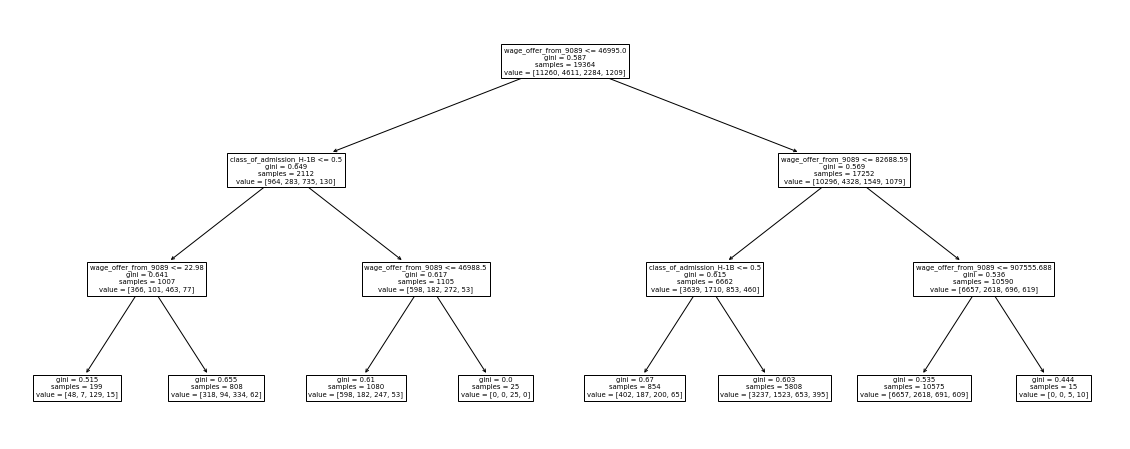

In [10]:
plt.figure(figsize = (20, 8))
tree.plot_tree(clf, feature_names= X.columns)

# 5.) Write your interpretation of the largest (by sample size) leaf node


#### If they are not certified, there is a high possibility that their wage offer from 9089 is less than 22.98 and their class of admission is not H-1B
#### Largest sample size is 10575, 82688.59<wage_offer_from_9089<=907555.688.

# 6.) Using a for loop, make your own train-test split and determine the best max_depth for out-of sample accuracy

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [12]:
max_depths = [1, 2, 3]
outputs = []
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)
for md in max_depths:
 clf = tree.DecisionTreeClassifier(max_depth = md)
 clf.fit(X_train, y_train)
 y_pred = clf.predict(X_test)
 oos_accuracy = accuracy_score(y_test, y_pred)
 outputs.append(oos_accuracy)
outputs

[0.5740103270223752, 0.5791738382099828, 0.5779690189328743]

The max depths with the highest accuracy is 2.